# Sea Level Predictor
This is my solution for the Sea Level Predictor project from FreeCodeCamp. Instructions for this project can be found [here](https://www.freecodecamp.org/learn/data-analysis-with-python/data-analysis-with-python-projects/sea-level-predictor).

## Introduction
Reuploaded from Replit to GitHub and converted to Jupyter Notebook for easier access

The original upload on Replit with my previous attempts can be found [here](https://replit.com/@yemelgen/boilerplate-sea-level-predictor).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

def draw_plot():
    # Read data from file
    df = pd.read_csv('data/epa-sea-level.csv', parse_dates=['Year'] )

    # Create scatter plot
    plt.figure( figsize=(12,6) )
    plt.scatter(df['Year'].dt.year, df['CSIRO Adjusted Sea Level'] )
    # Create first line of best fit
    line_1 = linregress( df['Year'].dt.year, df['CSIRO Adjusted Sea Level'] )
    year_2050 = pd.Series( range(1880, 2051) )
    sea_level_2050 = line_1.slope * year_2050 + line_1.intercept
    plt.plot(year_2050, sea_level_2050, color='r')

    # Create second line of best fit
    df_recent = df[ df['Year'].dt.year >= 2000 ]
    line_2 = linregress( df_recent['Year'].dt.year, df_recent['CSIRO Adjusted Sea Level'] )
    year_2000 = pd.Series( range(2000, 2051) )
    sea_level_2000 = line_2.slope * year_2000 + line_2.intercept
    plt.plot( year_2000, sea_level_2000, color='g')
    
    # Add labels and title
    plt.title('Rise in Sea Level')
    plt.xlabel('Year')
    plt.ylabel('Sea Level (inches)')

    # Save plot and return data for testing (DO NOT MODIFY)
    plt.savefig('sea_level_plot.png')
    return plt.gca()

# Create a clas sto wrap the solution code
class SeaLevelPredictor:
    def draw_plot(self, *args, **kwargs):
        return draw_plot()
sea_level_predictor = SeaLevelPredictor()

In [2]:
# NOTE: Copied from test_module.py
import unittest
import matplotlib as mpl
import numpy as np


# the test case
class LinePlotTestCase(unittest.TestCase):
    def setUp(self):
        self.ax = sea_level_predictor.draw_plot()

    def test_plot_title(self):
        actual = self.ax.get_title()
        expected = "Rise in Sea Level"
        self.assertEqual(actual, expected, "Expected line plot title to be 'Rise in Sea Level'")
    
    def test_plot_labels(self):
        actual = self.ax.get_xlabel()
        expected = "Year"
        self.assertEqual(actual, expected, "Expected line plot xlabel to be 'Year'")
        actual = self.ax.get_ylabel()
        expected = "Sea Level (inches)"
        self.assertEqual(actual, expected, "Expected line plot ylabel to be 'Sea Level (inches)'")
        actual = self.ax.get_xticks().tolist()
        expected = [1850.0, 1875.0, 1900.0, 1925.0, 1950.0, 1975.0, 2000.0, 2025.0, 2050.0, 2075.0]
        self.assertEqual(actual, expected, "Expected x tick labels to be '1850.0, 1875.0, 1900.0, 1925.0, 1950.0, 1975.0, 2000.0, 2025.0, 2050.0, 2075.0'")

    def test_plot_data_points(self):
        actual = self.ax.get_children()[0].get_offsets().data.tolist()
        expected = [[1880.0, 0.0], [1881.0, 0.220472441], [1882.0, -0.440944881], [1883.0, -0.232283464], [1884.0, 0.590551181], [1885.0, 0.531496062], [1886.0, 0.437007874], [1887.0, 0.216535433], [1888.0, 0.299212598], [1889.0, 0.362204724], [1890.0, 0.440944881], [1891.0, 0.374015748], [1892.0, 0.499999999], [1893.0, 0.685039369], [1894.0, 0.303149606], [1895.0, 0.767716535], [1896.0, 0.468503937], [1897.0, 0.673228346], [1898.0, 1.043307086], [1899.0, 1.338582676], [1900.0, 1.125984251], [1901.0, 1.110236219], [1902.0, 1.291338581], [1903.0, 1.606299211], [1904.0, 1.2007874], [1905.0, 0.984251968], [1906.0, 1.251968503], [1907.0, 1.196850392], [1908.0, 1.098425196], [1909.0, 1.27559055], [1910.0, 1.271653542], [1911.0, 1.598425195], [1912.0, 1.476377951], [1913.0, 1.547244093], [1914.0, 1.795275589], [1915.0, 2.10629921], [1916.0, 2.031496061], [1917.0, 1.854330707], [1918.0, 1.791338581], [1919.0, 1.854330707], [1920.0, 1.905511809], [1921.0, 1.988188974], [1922.0, 1.952755904], [1923.0, 1.999999998], [1924.0, 1.712598423], [1925.0, 1.791338581], [1926.0, 2.047244092], [1927.0, 2.003937006], [1928.0, 1.850393699], [1929.0, 1.905511809], [1930.0, 2.062992124], [1931.0, 2.047244092], [1932.0, 2.271653541], [1933.0, 2.440944879], [1934.0, 2.228346454], [1935.0, 2.448818895], [1936.0, 2.295275588], [1937.0, 2.519685037], [1938.0, 2.622047241], [1939.0, 2.826771651], [1940.0, 2.618110234], [1941.0, 3.098425194], [1942.0, 3.098425194], [1943.0, 3.098425194], [1944.0, 2.84645669], [1945.0, 2.95669291], [1946.0, 3.251968501], [1947.0, 3.374015745], [1948.0, 3.562992122], [1949.0, 3.51181102], [1950.0, 3.598425193], [1951.0, 3.972440941], [1952.0, 3.870078736], [1953.0, 4.043307082], [1954.0, 3.929133854], [1955.0, 3.964566925], [1956.0, 3.763779524], [1957.0, 4.291338578], [1958.0, 4.346456688], [1959.0, 4.358267712], [1960.0, 4.503937003], [1961.0, 4.748031491], [1962.0, 4.543307082], [1963.0, 4.480314956], [1964.0, 4.169291334], [1965.0, 4.610236216], [1966.0, 4.397637791], [1967.0, 4.452755901], [1968.0, 4.484251964], [1969.0, 4.751968499], [1970.0, 4.67716535], [1971.0, 4.881889759], [1972.0, 5.240157475], [1973.0, 5.003937003], [1974.0, 5.472440939], [1975.0, 5.409448813], [1976.0, 5.370078735], [1977.0, 5.303149601], [1978.0, 5.555118105], [1979.0, 5.362204719], [1980.0, 5.598425191], [1981.0, 6.086614167], [1982.0, 5.858267711], [1983.0, 6.188976372], [1984.0, 6.153543301], [1985.0, 5.74803149], [1986.0, 5.771653537], [1987.0, 5.795275585], [1988.0, 5.980314955], [1989.0, 6.157480309], [1990.0, 6.232283458], [1991.0, 6.334645663], [1992.0, 6.35826771], [1993.0, 6.291338576], [1994.0, 6.499999993], [1995.0, 6.618110229], [1996.0, 6.787401568], [1997.0, 7.066929127], [1998.0, 6.665354324], [1999.0, 7.011811016], [2000.0, 7.062992119], [2001.0, 7.287401567], [2002.0, 7.381889756], [2003.0, 7.759842512], [2004.0, 7.740157472], [2005.0, 7.74409448], [2006.0, 7.917322827], [2007.0, 7.996062984], [2008.0, 8.350393692], [2009.0, 8.586614164], [2010.0, 8.901574794], [2011.0, 8.96456692], [2012.0, 9.326771644], [2013.0, 8.980314951]]
        np.testing.assert_almost_equal(actual, expected, 7, "Expected different data points in scatter plot.")
    def test_plot_lines(self):
        actual = self.ax.get_lines()[0].get_ydata().tolist()
        expected = [-0.5421240249263661, -0.4790794409142336, -0.41603485690208686, -0.3529902728899543, -0.2899456888778218, -0.22690110486568926, -0.16385652085355673, -0.1008119368414242, -0.037767352829277456, 0.025277231182855076, 0.08832181519498761, 0.15136639920712014, 0.21441098321925267, 0.2774555672313852, 0.34050015124351773, 0.4035447352556645, 0.466589319267797, 0.5296339032799295, 0.5926784872920621, 0.6557230713041946, 0.7187676553163271, 0.7818122393284739, 0.8448568233406064, 0.9079014073527389, 0.9709459913648715, 1.033990575377004, 1.0970351593891365, 1.1600797434012833, 1.2231243274134158, 1.2861689114255483, 1.3492134954376809, 1.4122580794498134, 1.475302663461946, 1.5383472474740927, 1.6013918314862252, 1.6644364154983577, 1.7274809995104903, 1.7905255835226228, 1.8535701675347553, 1.9166147515468879, 1.9796593355590346, 2.042703919571167, 2.1057485035832997, 2.168793087595432, 2.2318376716075647, 2.2948822556196973, 2.357926839631844, 2.4209714236439766, 2.484016007656109, 2.5470605916682416, 2.610105175680374, 2.6731497596925067, 2.7361943437046534, 2.799238927716786, 2.8622835117289185, 2.925328095741051, 2.9883726797531835, 3.051417263765316, 3.1144618477774486, 3.1775064317895954, 3.240551015801728, 3.3035955998138604, 3.366640183825993, 3.4296847678381255, 3.492729351850258, 3.5557739358624048, 3.6188185198745373, 3.68186310388667, 3.7449076878988024, 3.807952271910935, 3.8709968559230674, 3.934041439935214, 3.9970860239473467, 4.060130607959479, 4.123175191971612, 4.186219775983744, 4.249264359995877, 4.312308944008024, 4.375353528020156, 4.438398112032289, 4.501442696044421, 4.564487280056554, 4.627531864068686, 4.690576448080819, 4.7536210320929655, 4.816665616105098, 4.879710200117231, 4.942754784129363, 5.005799368141496, 5.068843952153628, 5.131888536165775, 5.194933120177907, 5.25797770419004, 5.3210222882021725, 5.384066872214305, 5.4471114562264376, 5.510156040238584, 5.573200624250717, 5.636245208262849, 5.699289792274982, 5.762334376287114, 5.825378960299247, 5.8884235443113795, 5.951468128323526, 6.014512712335659, 6.077557296347791, 6.140601880359924, 6.203646464372056, 6.266691048384189, 6.329735632396336, 6.392780216408468, 6.455824800420601, 6.518869384432733, 6.581913968444866, 6.644958552456998, 6.708003136469145, 6.771047720481278, 6.83409230449341, 6.897136888505543, 6.960181472517675, 7.023226056529808, 7.086270640541954, 7.149315224554087, 7.2123598085662195, 7.275404392578352, 7.338448976590485, 7.401493560602617, 7.46453814461475, 7.527582728626896, 7.590627312639029, 7.653671896651161, 7.716716480663294, 7.7797610646754265, 7.842805648687559, 7.905850232699706, 7.968894816711838, 8.03193940072397, 8.094983984736103, 8.158028568748236, 8.221073152760368, 8.284117736772515, 8.347162320784648, 8.41020690479678, 8.473251488808913, 8.536296072821045, 8.599340656833178, 8.66238524084531, 8.725429824857457, 8.78847440886959, 8.851518992881722, 8.914563576893855, 8.977608160905987, 9.040652744918134, 9.103697328930252, 9.166741912942399, 9.229786496954517, 9.292831080966664, 9.35587566497881, 9.41892024899093, 9.481964833003076, 9.545009417015194, 9.608054001027341, 9.671098585039488, 9.734143169051606, 9.797187753063753, 9.860232337075871, 9.923276921088018, 9.986321505100136, 10.049366089112283, 10.11241067312443, 10.175455257136548]
        np.testing.assert_almost_equal(actual, expected, 7, "Expected different line for first line of best fit.")
        actual = self.ax.get_lines()[1].get_ydata().tolist()
        expected = [7.06107985777146, 7.227507131103323, 7.393934404435242, 7.560361677767105, 7.726788951098968, 7.89321622443083, 8.059643497762693, 8.226070771094555, 8.392498044426418, 8.55892531775828, 8.725352591090143, 8.891779864422006, 9.058207137753925, 9.224634411085788, 9.39106168441765, 9.557488957749513, 9.723916231081375, 9.890343504413238, 10.0567707777451, 10.223198051076963, 10.389625324408826, 10.556052597740688, 10.72247987107255, 10.88890714440447, 11.055334417736333, 11.221761691068195, 11.388188964400058, 11.55461623773192, 11.721043511063783, 11.887470784395646, 12.053898057727508, 12.220325331059371, 12.386752604391233, 12.553179877723153, 12.719607151055015, 12.886034424386878, 13.05246169771874, 13.218888971050603, 13.385316244382466, 13.551743517714328, 13.718170791046191, 13.884598064378054, 14.051025337709916, 14.217452611041836, 14.383879884373698, 14.55030715770556, 14.716734431037423, 14.883161704369286, 15.049588977701148, 15.216016251033011, 15.382443524364874]
        np.testing.assert_almost_equal(actual, expected, 7, "Expected different line for second line of best fit.")


....
----------------------------------------------------------------------
Ran 4 tests in 2.521s

OK


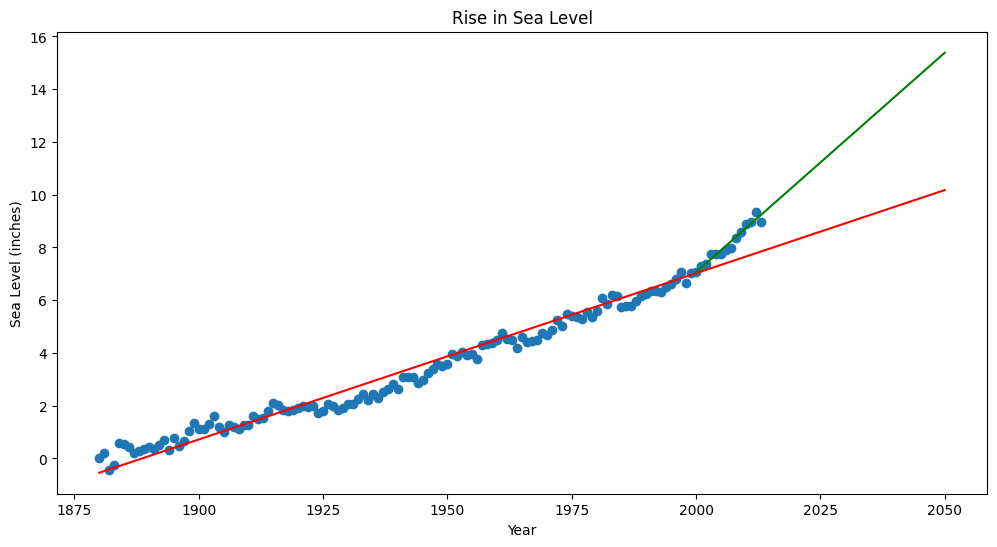

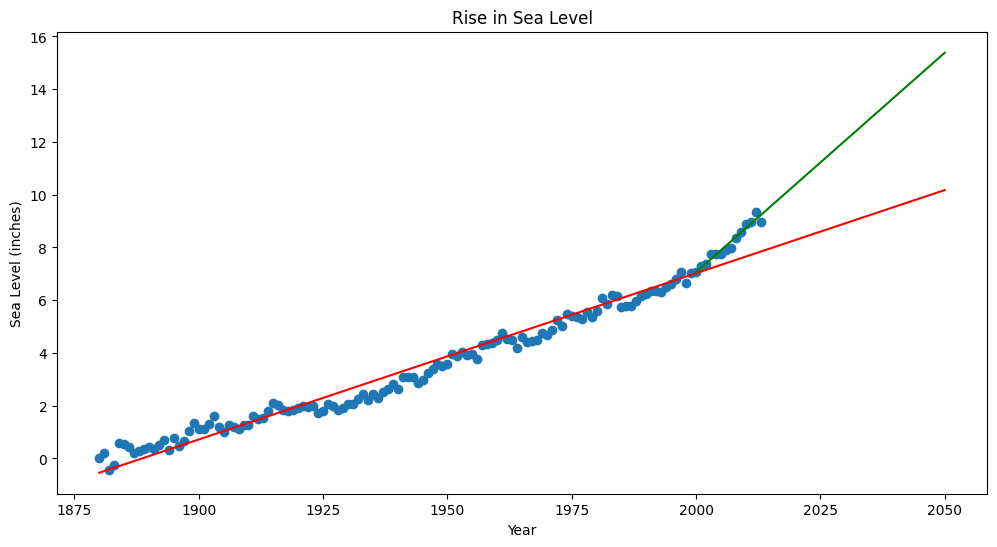

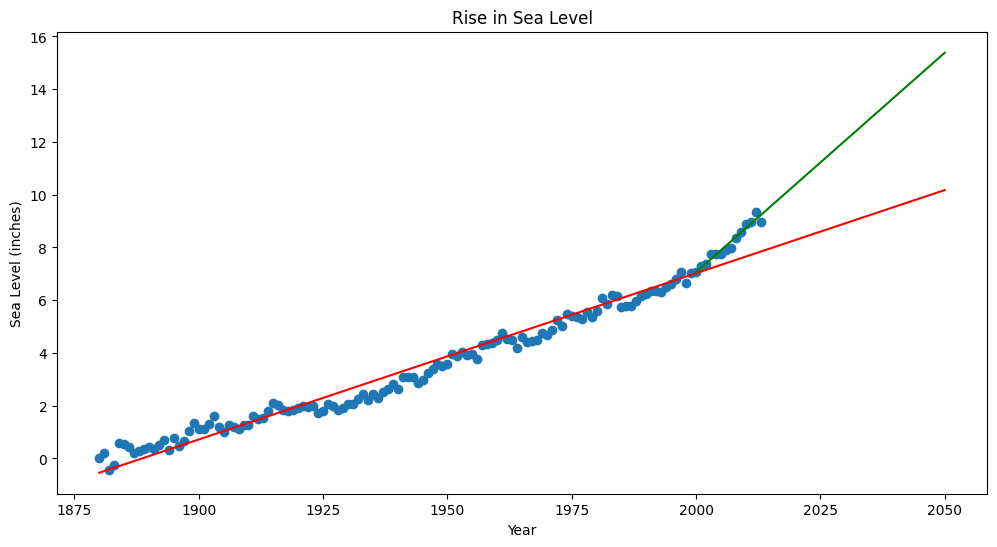

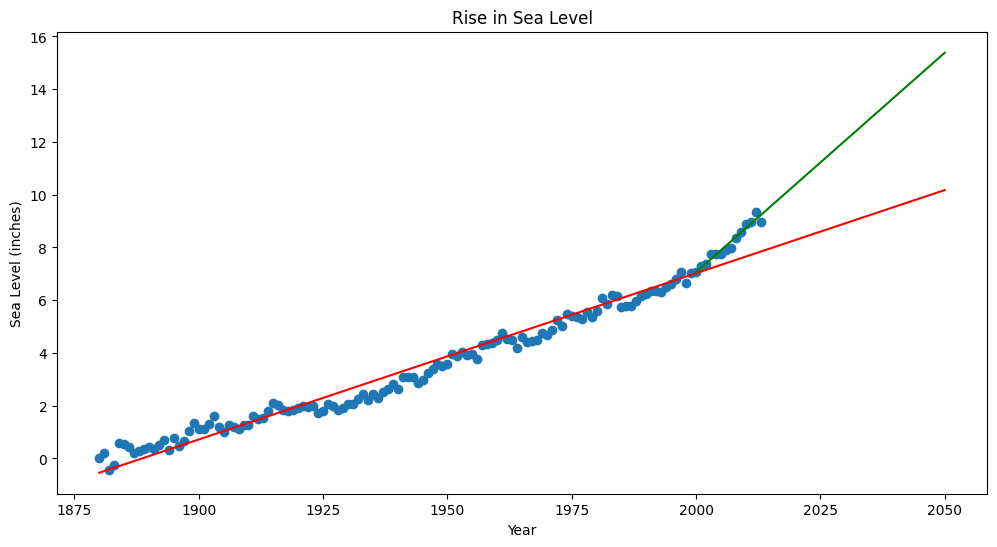

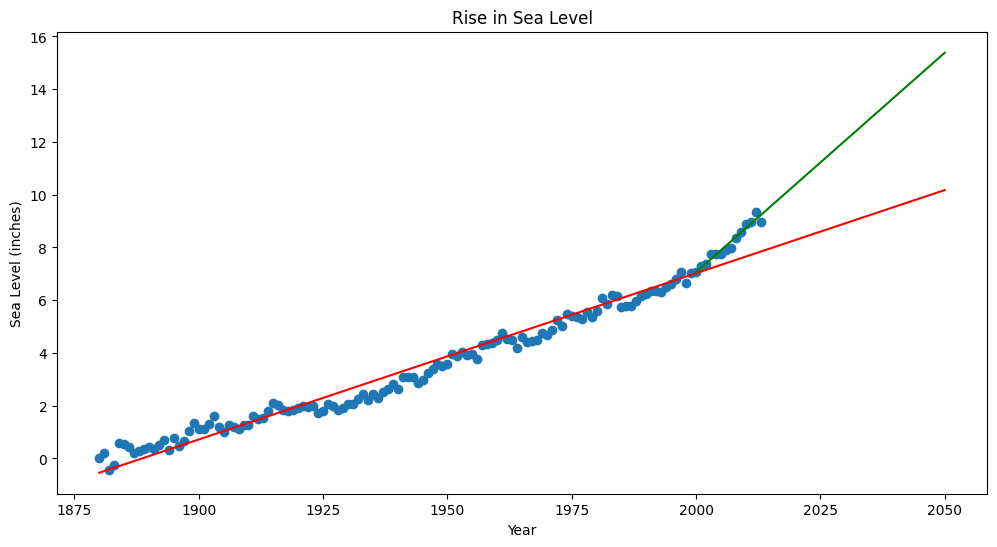

In [3]:
# NOTE: Copied from main.py
# This entrypoint file to be used in development. Start by reading README.md
from unittest import main

# Test your function by calling it here
sea_level_predictor.draw_plot()

# Run unit tests automatically
main(argv=[''], exit=False)